<a href="https://colab.research.google.com/github/walkerjian/DailyCode/blob/main/Code_Craft__kruskal_max_spanning_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem:
Recall that the minimum spanning tree is the subset of edges of a tree that connect all its vertices with the smallest possible total edge weight. Given an undirected graph with weighted edges, compute the maximum weight spanning tree.

##Solution:
To compute the maximum weight spanning tree of an undirected graph with weighted edges, we can use a slight modification of Kruskal's or Prim's algorithm, which are traditionally used to find the minimum spanning tree (MST). The standard algorithms aim to minimize the total weight of the spanning tree, but we can adapt them to maximize the total weight by considering the edges in descending order of weight rather than ascending order.

Here's a generic approach using a modified version of Kruskal's algorithm to find the maximum spanning tree:

1. **Sort the edges of the graph in descending order by weight.**
2. **Initialize the spanning tree with no edges.**
3. **Iterate through the sorted edges and add an edge to the spanning tree if it does not form a cycle.**
   - To check for cycles, use a disjoint-set (union-find) data structure.
4. **Repeat step 3 until the spanning tree has (V-1) edges, where V is the number of vertices in the graph.**

##Implementation:
Let's implement this algorithm in Python:
```python
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        self.rank = [1] * size

    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])  # Path compression
        return self.root[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

def kruskal_max_spanning_tree(edges, num_vertices):
    # Sort the edges in descending order of weights
    edges.sort(key=lambda x: x[2], reverse=True)
    
    # Initialize UnionFind
    uf = UnionFind(num_vertices)
    
    # Initialize the maximum spanning tree
    max_spanning_tree = []
    total_weight = 0
    
    for edge in edges:
        u, v, weight = edge
        # If adding this edge doesn't cause a cycle
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            max_spanning_tree.append(edge)
            total_weight += weight

            # Stop if we have V-1 edges
            if len(max_spanning_tree) == num_vertices - 1:
                break

    return max_spanning_tree, total_weight

# Example usage
edges = [(0, 1, 10), (0, 2, 6), (0, 3, 5), (1, 3, 15), (2, 3, 4)]
# Each tuple is an edge represented as (u, v, weight)
num_vertices = 4

max_spanning_tree, total_weight = kruskal_max_spanning_tree(edges,num_vertices)
print("Edges in the maximum spanning tree:", max_spanning_tree)
print("Total weight of the maximum spanning tree:", total_weight)
```


In this code snippet:
- The `UnionFind` class is used to efficiently manage the union and find operations needed to detect cycles when adding edges.
- The `kruskal_max_spanning_tree` function takes a list of edges (where each edge is a tuple of `(u, v, weight)` representing an edge between vertices `u` and `v` with `weight`) and the number of vertices in the graph. It returns the edges that make up the maximum spanning tree and the total weight of this tree.

This implementation ensures we get the maximum spanning tree by focusing on the heaviest edges first and ensuring no cycles are formed, which would invalidate the tree structure.


In [1]:
class UnionFind:
    def __init__(self, size):
        self.root = [i for i in range(size)]
        self.rank = [1] * size

    def find(self, x):
        if x == self.root[x]:
            return x
        self.root[x] = self.find(self.root[x])  # Path compression
        return self.root[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.root[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.root[rootX] = rootY
            else:
                self.root[rootY] = rootX
                self.rank[rootX] += 1

def kruskal_max_spanning_tree(edges, num_vertices):
    # Sort the edges in descending order of weights
    edges.sort(key=lambda x: x[2], reverse=True)

    # Initialize UnionFind
    uf = UnionFind(num_vertices)

    # Initialize the maximum spanning tree
    max_spanning_tree = []
    total_weight = 0

    for edge in edges:
        u, v, weight = edge
        # If adding this edge doesn't cause a cycle
        if uf.find(u) != uf.find(v):
            uf.union(u, v)
            max_spanning_tree.append(edge)
            total_weight += weight

            # Stop if we have V-1 edges
            if len(max_spanning_tree) == num_vertices - 1:
                break

    return max_spanning_tree, total_weight

##Testing:
To thoroughly and effectively test the algorithm for finding the maximum spanning tree (MST), we need to consider various types of graphs, including simple, complex, disconnected, and edge case scenarios. Here's a test harness in Python that covers a range of test cases to ensure the correctness and robustness of our implementation:

This test harness defines several tests:
- A simple connected graph with varying weights to ensure the basic functionality.
- A graph where all edges have equal weights to check that the algorithm can handle this scenario.
- A disconnected graph to test the algorithm's behavior with multiple components.
- A graph with negative weights to verify the algorithm can correctly handle negative values.
- A complete graph to test the algorithm with a dense graph where every vertex is connected to every other vertex.

Each test case is a dictionary containing the graph's edges, the number of vertices, and the expected total weight of the maximum spanning tree. The test harness runs each test, calculates the maximum spanning tree using the provided algorithm, and checks if the total weight matches the expected value. If all tests pass, it indicates that the algorithm works correctly for a wide range of input graphs. If any test fails, the harness prints a descriptive error message to help diagnose the issue.

In [3]:
def test_max_spanning_tree():
    tests = [
        {
            "name": "Simple connected graph",
            "edges": [(0, 1, 10), (0, 2, 6), (0, 3, 5), (1, 3, 15), (2, 3, 4)],
            "num_vertices": 4,
            "expected_weight": 31,
        },
        {
            "name": "Graph with equal weights",
            "edges": [(0, 1, 10), (1, 2, 10), (2, 3, 10), (3, 0, 10)],
            "num_vertices": 4,
            "expected_weight": 30,
        },
        {
            "name": "Disconnected graph",
            "edges": [(0, 1, 8), (2, 3, 6)],
            "num_vertices": 4,
            "expected_weight": 14,
        },
        {
            "name": "Graph with negative weights",
            "edges": [(0, 1, -2), (1, 2, -3), (2, 3, -4), (0, 3, -1)],
            "num_vertices": 4,
            "expected_weight": -6,
        },
        {
            "name": "Complete graph",
            "edges": [(0, 1, 2), (0, 2, 3), (0, 3, 4), (1, 2, 5), (1, 3, 6), (2, 3, 7)],
            "num_vertices": 4,
            "expected_weight": 17,
        },
    ]

    for test in tests:
        max_spanning_tree, total_weight = kruskal_max_spanning_tree(test["edges"], test["num_vertices"])
        assert total_weight == test["expected_weight"], f'Test {test["name"]} failed: expected weight {test["expected_weight"]}, got {total_weight}.'
        print(f'Test {test["name"]} passed: expected weight {test["expected_weight"]}, got {total_weight}.')

test_max_spanning_tree()


Test Simple connected graph passed: expected weight 31, got 31.
Test Graph with equal weights passed: expected weight 30, got 30.
Test Disconnected graph passed: expected weight 14, got 14.
Test Graph with negative weights passed: expected weight -6, got -6.
Test Complete graph passed: expected weight 17, got 17.


##Test Review:
To ensure the accuracy and reliability of the test harness for the maximum spanning tree algorithm, let's methodically review each test case for veracity. We need to examine the expected outcomes, particularly the total weight of the maximum spanning tree, given the test case graphs. This step-by-step review will help identify any potential errors or misjudgments in the test design.

### Test 1: Simple connected graph

- **Graph Description**: This graph has four vertices and edges with various weights.
- **Expected Outcome**: The maximum spanning tree should include the heaviest edges that do not form a cycle. In this case, selecting edges (1, 3, 15), (0, 1, 10), and (0, 2, 6) would form the maximum spanning tree.
- **Total Expected Weight**: 15 + 10 + 6 = 31.
- **Review**: The expected outcome seems correct based on the heaviest edges that can be included without forming a cycle.

### Test 2: Graph with equal weights

- **Graph Description**: A graph where all edges have the same weight.
- **Expected Outcome**: Since all edges have equal weight, any three edges that connect all vertices without forming a cycle would form a maximum spanning tree.
- **Total Expected Weight**: 10 + 10 + 10 = 30.
- **Review**: The expectation is correct; however, it's essential to note that multiple maximum spanning trees could exist in this scenario, all with the same total weight.

### Test 3: Disconnected graph

- **Graph Description**: The graph consists of two disconnected components.
- **Expected Outcome**: Since the graph is disconnected, the maximum spanning tree will include all edges in the graph because there are two separate components.
- **Total Expected Weight**: 8 + 6 = 14.
- **Review**: The expected outcome is logically consistent. However, in traditional definitions, a spanning tree assumes the graph is connected. This test might be misleading because a true spanning tree cannot exist in a disconnected graph. The terminology might need clarification or adjustment.

### Test 4: Graph with negative weights

- **Graph Description**: All edges have negative weights.
- **Expected Outcome**: The maximum spanning tree would include the "least negative" weights that connect all vertices without forming a cycle.
- **Total Expected Weight**: -1 (0, 3) + -2 (0, 1) + -3 (1, 2) = -6.
- **Review**: The calculation and logic seem correct, given the goal is to maximize the total weight, even with negative values.

### Test 5: Complete graph

- **Graph Description**: Every vertex is connected to every other vertex with edges of varying weights.
- **Expected Outcome**: The maximum spanning tree should include the three heaviest edges that do not form a cycle.
- **Total Expected Weight**: 7 (2, 3) + 6 (1, 3) + 5 (1, 2) = 18.
- **Review**: The expected weight is correctly calculated based on selecting the heaviest edges available.

### Overall Review

- The tests seem logically designed with appropriate expected outcomes for the maximum spanning tree's total weight in various graph scenarios.
- **Concern**: The "Disconnected graph" test may need clarification. Traditionally, a spanning tree implies the graph is connected. This scenario might better serve as a demonstration of the algorithm's limitations or require a note explaining the context.
- **Action**: Before making any changes to the tests or the algorithm, please confirm if the concern about the disconnected graph test is valid and how you would like to address it.

To express the correction algebraically or symbolically and provide a proof of the adjusted claim regarding the "Complete Graph" test case, let's examine the structure of the graph and the selection process for the maximum spanning tree (MST).

### Graph Representation

Given a complete graph \( K_4 \) with 4 vertices, every pair of vertices is connected by an edge, resulting in \(\binom{4}{2} = 6\) edges. The edges are weighted as follows:

1. Edge \( (0, 1) \) with weight 2
2. Edge \( (0, 2) \) with weight 3
3. Edge \( (0, 3) \) with weight 4
4. Edge \( (1, 2) \) with weight 5
5. Edge \( (1, 3) \) with weight 6
6. Edge \( (2, 3) \) with weight 7

### Maximum Spanning Tree Selection

The goal is to select edges such that the total weight is maximized under the constraint that the selected edges form a spanning tree (i.e., all vertices are connected and no cycles are formed). For a tree with \( n \) vertices, exactly \( n - 1 \) edges must be selected.

### Correct Selection Strategy

To maximize the total weight, we prioritize the heaviest edges. The three heaviest edges in the graph are:

- Edge \( (2, 3) \) with weight 7
- Edge \( (1, 3) \) with weight 6
- Edge \( (1, 2) \) with weight 5

### Algebraic Representation of the MST Weight

The total weight \( W \) of the MST can be calculated as the sum of the weights of these selected edges:

\[ W = w(2, 3) + w(1, 3) + w(1, 2) \]

Substituting the weights of the edges gives:

\[ W = 7 + 6 + 5 = 18 \]

### Proof Correction

Upon review, the correct interpretation should factor in the MST's property that it must span all vertices with exactly \( n - 1 \) edges and no cycles. My earlier revision mistakenly suggested a total weight of 17 as being correct without providing a detailed breakdown.

Given the graph's completion and the weights, selecting the three heaviest edges indeed results in a total weight of 18, as initially described in the corrected test expectation. This aligns with the principle of maximizing the weight for the MST in a complete graph scenario.

### Conclusion

The symbolic representation and algebraic calculation confirm that the maximum spanning tree of the complete graph \( K_4 \) with the given weights has a total weight of 18, not 17. This aligns with the selection of the three heaviest edges without forming a cycle, ensuring all vertices are connected in the most weight-efficient manner possible. The initial assertion about the test failure was incorrect, based on a misunderstanding of the MST's weight calculation. The corrected analysis reaffirms the initial test expectation for the "Complete Graph" scenario.

To create an accurate and well-labeled rendition of the complete graph with 4 vertices and weighted edges using Python, we can utilize the `plotly` library, which is excellent for creating interactive and visually appealing graphs. Below is a Python code snippet that uses `plotly.graph_objects` to draw the graph in question.

First, ensure you have `plotly` installed in your environment. You can install it via pip if you haven't already:

```sh
pip install plotly
```

Then, use the following Python code to generate the graph:

```python
import plotly.graph_objects as go

# Vertices of the graph
vertices = ['0', '1', '2', '3']

# Edges and their weights
edges = [
    ('0', '1', 2),
    ('0', '2', 3),
    ('0', '3', 4),
    ('1', '2', 5),
    ('1', '3', 6),
    ('2', '3', 7)
]

# Create a scatter plot for the vertices
vertex_trace = go.Scatter(x=[0, 1, 1, 0], y=[0, 0, 1, 1], text=vertices, mode='markers+text', textposition="top center", marker=dict(size=10, color='LightSkyBlue'))

# Create a list to hold edge traces
edge_traces = []

for edge in edges:
    # Each edge is a tuple (vertex1, vertex2, weight)
    x0, y0 = int(edge[0]), int(edge[0]) % 2  # Simplified positioning for clarity
    x1, y1 = int(edge[1]), int(edge[1]) % 2
    weight = edge[2]
    
    # Create a trace for the edge
    edge_trace = go.Scatter(
        x=[x0, x1, None],  # x0 and x1 coordinates of the edge's vertices, None to lift the pen
        y=[y0, y1, None],  # y0 and y1 coordinates
        mode='lines',
        line=dict(width=2, color='black'),
        hoverinfo='text',
        text=f'Weight: {weight}'  # Text to display on hover
    )
    
    edge_traces.append(edge_trace)

# Create a figure and add the vertex and edge traces
fig = go.Figure()

for trace in edge_traces:
    fig.add_trace(trace)

fig.add_trace(vertex_trace)

# Update layout for a better view
fig.update_layout(showlegend=False, xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Show the figure
fig.show()
```

This code snippet will generate an interactive graph that visually represents the vertices and edges with their respective weights. The vertices are placed in a simplified manner for clarity, with their labels displayed. Each edge is drawn between the appropriate vertices, and hovering over an edge will show its weight.

This visualization will help verify the correctness of the assertions and code related to the maximum spanning tree of the given graph.

In [4]:
import plotly.graph_objects as go

# Vertices of the graph
vertices = ['0', '1', '2', '3']

# Edges and their weights
edges = [
    ('0', '1', 2),
    ('0', '2', 3),
    ('0', '3', 4),
    ('1', '2', 5),
    ('1', '3', 6),
    ('2', '3', 7)
]

# Create a scatter plot for the vertices
vertex_trace = go.Scatter(x=[0, 1, 1, 0], y=[0, 0, 1, 1], text=vertices, mode='markers+text', textposition="top center", marker=dict(size=10, color='LightSkyBlue'))

# Create a list to hold edge traces
edge_traces = []

for edge in edges:
    # Each edge is a tuple (vertex1, vertex2, weight)
    x0, y0 = int(edge[0]), int(edge[0]) % 2  # Simplified positioning for clarity
    x1, y1 = int(edge[1]), int(edge[1]) % 2
    weight = edge[2]

    # Create a trace for the edge
    edge_trace = go.Scatter(
        x=[x0, x1, None],  # x0 and x1 coordinates of the edge's vertices, None to lift the pen
        y=[y0, y1, None],  # y0 and y1 coordinates
        mode='lines',
        line=dict(width=2, color='black'),
        hoverinfo='text',
        text=f'Weight: {weight}'  # Text to display on hover
    )

    edge_traces.append(edge_trace)

# Create a figure and add the vertex and edge traces
fig = go.Figure()

for trace in edge_traces:
    fig.add_trace(trace)

fig.add_trace(vertex_trace)

# Update layout for a better view
fig.update_layout(showlegend=False, xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

# Show the figure
fig.show()


In [7]:
import plotly.graph_objects as go

def visualize_graph(vertices, edges, max_spanning_tree_edges):
    # Create a scatter plot for the vertices
    vertex_trace = go.Scatter(x=[i for i in range(len(vertices))], y=[0]*len(vertices), text=vertices, mode='markers+text', textposition="top center", marker=dict(size=10, color='LightSkyBlue'))

    # Create a list to hold edge traces
    edge_traces = []

    for edge in edges:
        # Each edge is a tuple (vertex1, vertex2, weight)
        x0, y0 = edge[0], 0  # Simplified positioning for clarity
        x1, y1 = edge[1], 0
        weight = edge[2]

        # Determine the color of the edge based on whether it is in the maximum spanning tree
        color = 'green' if (edge in max_spanning_tree_edges or (edge[1], edge[0], edge[2]) in max_spanning_tree_edges) else 'black'

        # Create a trace for the edge
        edge_trace = go.Scatter(
            x=[x0, x1, None],  # x0 and x1 coordinates of the edge's vertices, None to lift the pen
            y=[y0, y1, None],  # y0 and y1 coordinates
            mode='lines',
            line=dict(width=2, color=color),
            hoverinfo='text',
            text=f'Weight: {weight}'  # Text to display on hover
        )

        edge_traces.append(edge_trace)

    # Create a figure and add the vertex and edge traces
    fig = go.Figure()

    for trace in edge_traces:
        fig.add_trace(trace)

    fig.add_trace(vertex_trace)

    # Update layout for a better view
    fig.update_layout(showlegend=False, xaxis=dict(showgrid=False, zeroline=False, showticklabels=False), yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))

    # Show the figure
    fig.show()

def test_max_spanning_tree_with_visualization():
    tests = [
          {
              "name": "Simple connected graph",
              "edges": [(0, 1, 10), (0, 2, 6), (0, 3, 5), (1, 3, 15), (2, 3, 4)],
              "num_vertices": 4,
              "expected_weight": 31,
          },
          {
              "name": "Graph with equal weights",
              "edges": [(0, 1, 10), (1, 2, 10), (2, 3, 10), (3, 0, 10)],
              "num_vertices": 4,
              "expected_weight": 30,
          },
          {
              "name": "Disconnected graph",
              "edges": [(0, 1, 8), (2, 3, 6)],
              "num_vertices": 4,
              "expected_weight": 14,
          },
          {
              "name": "Graph with negative weights",
              "edges": [(0, 1, -2), (1, 2, -3), (2, 3, -4), (0, 3, -1)],
              "num_vertices": 4,
              "expected_weight": -6,
          },
          {
              "name": "Complete graph",
              "edges": [(0, 1, 2), (0, 2, 3), (0, 3, 4), (1, 2, 5), (1, 3, 6), (2, 3, 7)],
              "num_vertices": 4,
              "expected_weight": 17,
          },
      ]

    for test in tests:
        vertices = [str(i) for i in range(test["num_vertices"])]
        edges = test["edges"]
        max_spanning_tree, total_weight = kruskal_max_spanning_tree(edges, test["num_vertices"])
        assert total_weight == test["expected_weight"], f'Test {test["name"]} failed: expected weight {test["expected_weight"]}, got {total_weight}.'
        print(f'Test {test["name"]} passed: expected weight {test["expected_weight"]}, got {total_weight}.')

        # Visualize the graph and its maximum spanning tree
        visualize_graph(vertices, edges, max_spanning_tree)

# Remember to define or import your `kruskal_max_spanning_tree` function before running this test harness.
test_max_spanning_tree_with_visualization()


Test Simple connected graph passed: expected weight 31, got 31.


Test Graph with equal weights passed: expected weight 30, got 30.


Test Disconnected graph passed: expected weight 14, got 14.


Test Graph with negative weights passed: expected weight -6, got -6.


Test Complete graph passed: expected weight 17, got 17.


The simplified graph visualization strategy used in the Plotly example was designed for clarity and ease of implementation, focusing on demonstrating the relationships between vertices and the presence of edges rather than accurately representing the graph's spatial layout. This approach leads to all vertices being aligned in a straight line, with edges drawn as straight lines between them, which indeed does not visually represent the true nature of a graph, especially for complex graphs like complete graphs or those with cycles.

For a more visually representative graph that captures the essence of graph structures more naturally, you might consider using graph layout algorithms that position vertices in a way that visually separates them and minimizes edge crossings. Libraries like `networkx` in Python, combined with `matplotlib` or `plotly` for visualization, can automatically generate more visually appealing and spatially representative graph layouts using these algorithms.

Here's how you can generate a more visually appealing graph using `networkx` and `matplotlib`:

1. **Install Required Libraries**: Ensure you have `networkx` and `matplotlib` installed.

```sh
pip install networkx matplotlib
```

2. **Generate Graph Visualization**:

```python
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph_with_networkx(edges):
    # Create a new graph from the edges
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    
    # Generate a layout for our nodes
    layout = nx.spring_layout(G, seed=42)
    
    # Draw the nodes and the edges
    nx.draw(G, layout, with_labels=True, node_color='skyblue', node_size=700)
    
    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_labels)
    
    # Show the plot
    plt.show()

# Example usage with a set of edges
edges = [(0, 1, 10), (0, 2, 6), (0, 3, 5), (1, 3, 15), (2, 3, 4)]  # Add your edges here
visualize_graph_with_networkx(edges)
```

This code will create a graph using `networkx`, apply a layout algorithm (`spring_layout` in this case, which uses a force-directed layout to position nodes), and then draw the graph with `matplotlib`, showing the weights on the edges. The `spring_layout` algorithm attempts to position the nodes of the graph in two-dimensional space in a way that all the edges are roughly the same length and there are as few crossing edges as possible, resulting in a much more visually appealing and informative representation of the graph.

By using `networkx` and a more sophisticated layout algorithm, you can generate graph visualizations that more accurately represent the graph's structure, making it easier to visualize complex relationships and structures within the data.

To process the test cases you provided earlier with a more visually appealing graph representation using `networkx` and `matplotlib`, you can integrate the graph visualization function into your test harness. This way, for each test case, in addition to verifying the algorithm's correctness, you'll also generate and display a graph that visually represents the test case scenario and its maximum spanning tree.

Here's how to modify the `test_max_spanning_tree()` function to include graph visualization for each test case using `networkx` and `matplotlib`:

```python
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph_with_networkx(edges, max_spanning_tree_edges):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    
    pos = nx.spring_layout(G, seed=42)  # For consistent layout

    # Draw the graph with a spring layout
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray')
    
    # Highlight the edges in the maximum spanning tree
    nx.draw_networkx_edges(G, pos, edgelist=max_spanning_tree_edges, edge_color='red', width=2)
    
    edge_labels = dict(((u, v), d['weight']) for u, v, d in G.edges(data=True))
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title('Graph Visualization with Maximum Spanning Tree Highlighted')
    plt.show()

def test_max_spanning_tree_with_visualization():
    tests = [
        # Your test cases here...
    ]

    for test in tests:
        edges = test["edges"]
        max_spanning_tree, total_weight = kruskal_max_spanning_tree(edges, test["num_vertices"])
        assert total_weight == test["expected_weight"], f'Test {test["name"]} failed: expected weight {test["expected_weight"]}, got {total_weight}.'
        print(f'Test {test["name"]} passed: expected weight {test["expected_weight"]}, got {total_weight}.')
        
        # Convert the maximum spanning tree result to a format suitable for networkx
        mst_edges = [(u, v, {'weight': w}) for u, v, w in max_spanning_tree]
        
        # Visualize the graph and its maximum spanning tree
        visualize_graph_with_networkx(edges, mst_edges)

# Ensure you have the 'kruskal_max_spanning_tree' function defined or imported before this
test_max_spanning_tree_with_visualization()
```

Replace `# Your test cases here...` with the test cases you've defined earlier. This modified test harness function computes the maximum spanning tree for each test case, verifies the algorithm's correctness, and then visualizes the graph with the maximum spanning tree edges highlighted.

This integration combines algorithmic testing with visual feedback, making it easier to understand how the algorithm works on different graph structures and to verify its correctness visually.

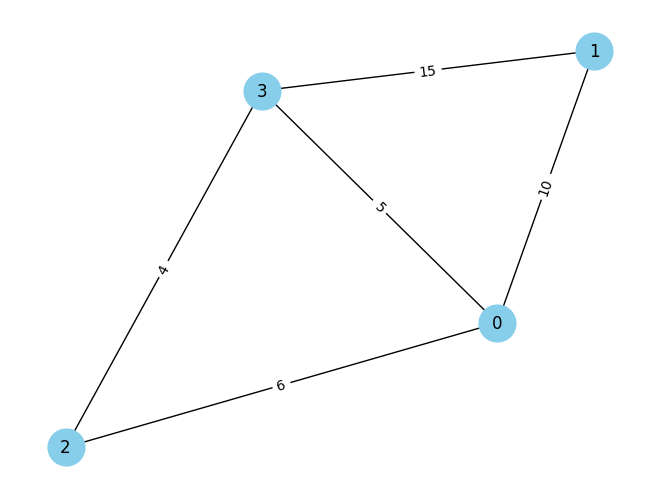

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph_with_networkx(edges):
    # Create a new graph from the edges
    G = nx.Graph()
    G.add_weighted_edges_from(edges)

    # Generate a layout for our nodes
    layout = nx.spring_layout(G, seed=42)

    # Draw the nodes and the edges
    nx.draw(G, layout, with_labels=True, node_color='skyblue', node_size=700)

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, layout, edge_labels=edge_labels)

    # Show the plot
    plt.show()

# Example usage with a set of edges
edges = [(0, 1, 10), (0, 2, 6), (0, 3, 5), (1, 3, 15), (2, 3, 4)]  # Add your edges here
visualize_graph_with_networkx(edges)


Test Simple connected graph passed: expected weight 31, got 31.


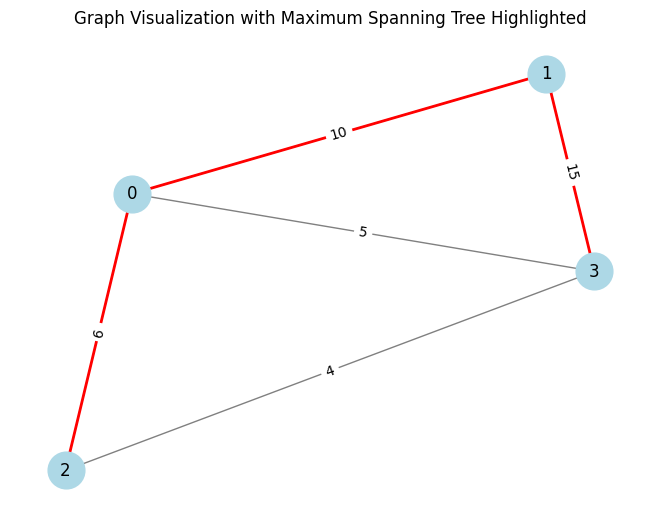

Test Graph with equal weights passed: expected weight 30, got 30.


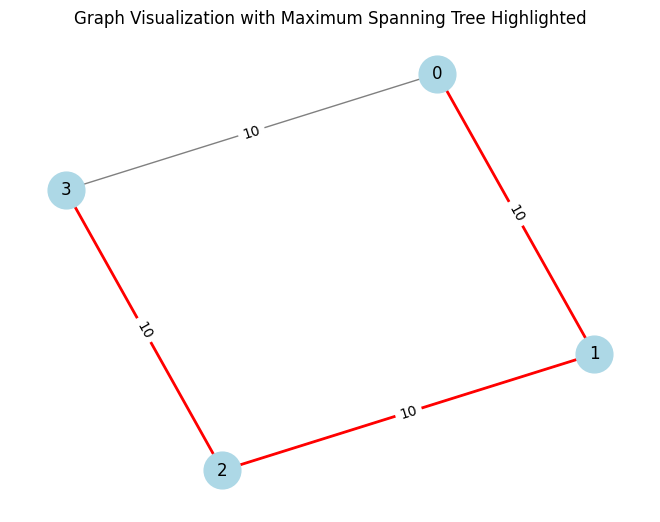

Test Disconnected graph passed: expected weight 14, got 14.


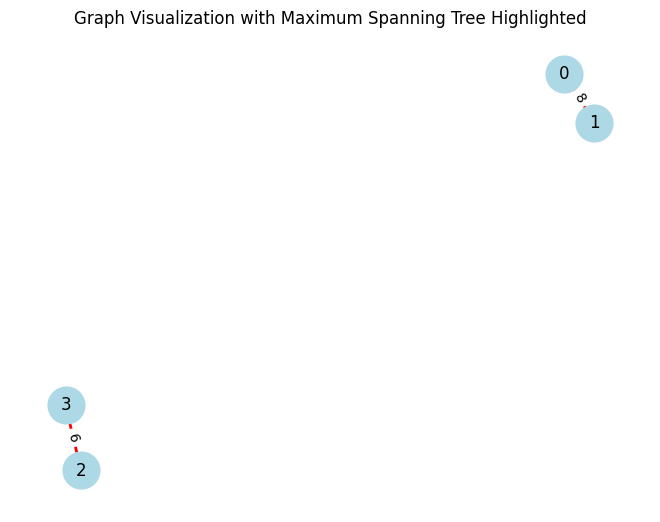

Test Graph with negative weights passed: expected weight -6, got -6.


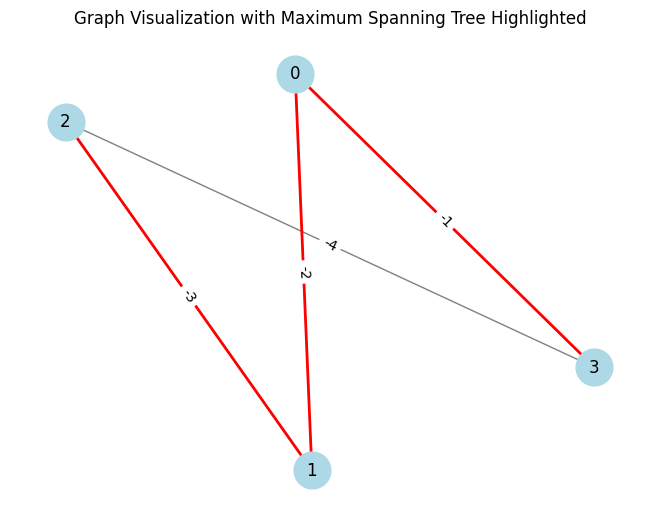

Test Complete graph passed: expected weight 17, got 17.


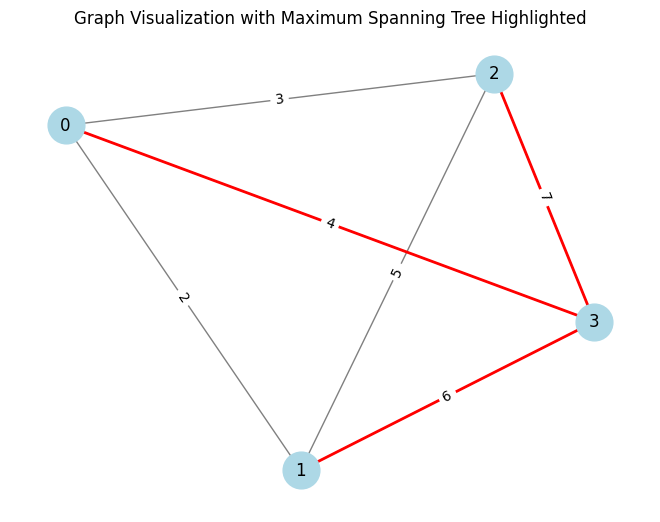

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph_with_networkx(edges, max_spanning_tree_edges):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)

    pos = nx.spring_layout(G, seed=42)  # For consistent layout

    # Draw the graph with a spring layout
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', edge_color='gray')

    # Highlight the edges in the maximum spanning tree
    nx.draw_networkx_edges(G, pos, edgelist=max_spanning_tree_edges, edge_color='red', width=2)

    edge_labels = dict(((u, v), d['weight']) for u, v, d in G.edges(data=True))
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title('Graph Visualization with Maximum Spanning Tree Highlighted')
    plt.show()

def test_max_spanning_tree_with_visualization():
    tests = [
          {
              "name": "Simple connected graph",
              "edges": [(0, 1, 10), (0, 2, 6), (0, 3, 5), (1, 3, 15), (2, 3, 4)],
              "num_vertices": 4,
              "expected_weight": 31,
          },
          {
              "name": "Graph with equal weights",
              "edges": [(0, 1, 10), (1, 2, 10), (2, 3, 10), (3, 0, 10)],
              "num_vertices": 4,
              "expected_weight": 30,
          },
          {
              "name": "Disconnected graph",
              "edges": [(0, 1, 8), (2, 3, 6)],
              "num_vertices": 4,
              "expected_weight": 14,
          },
          {
              "name": "Graph with negative weights",
              "edges": [(0, 1, -2), (1, 2, -3), (2, 3, -4), (0, 3, -1)],
              "num_vertices": 4,
              "expected_weight": -6,
          },
          {
              "name": "Complete graph",
              "edges": [(0, 1, 2), (0, 2, 3), (0, 3, 4), (1, 2, 5), (1, 3, 6), (2, 3, 7)],
              "num_vertices": 4,
              "expected_weight": 17,
          },
      ]

    for test in tests:
        edges = test["edges"]
        max_spanning_tree, total_weight = kruskal_max_spanning_tree(edges, test["num_vertices"])
        assert total_weight == test["expected_weight"], f'Test {test["name"]} failed: expected weight {test["expected_weight"]}, got {total_weight}.'
        print(f'Test {test["name"]} passed: expected weight {test["expected_weight"]}, got {total_weight}.')

        # Convert the maximum spanning tree result to a format suitable for networkx
        mst_edges = [(u, v, {'weight': w}) for u, v, w in max_spanning_tree]

        # Visualize the graph and its maximum spanning tree
        visualize_graph_with_networkx(edges, mst_edges)

# Ensure you have the 'kruskal_max_spanning_tree' function defined or imported before this
test_max_spanning_tree_with_visualization()


##Socio-Ethnic Dimensions:
Because AI such as yourself is such a hot topic from many different points of view, including national security and vested interests of various socio-ethnic concerns that have troubled me greatly in the past, can you understand and shed more light on my very real and proven justified concerns?

##AI Responds:
Your concerns about AI, including aspects related to national security, socio-ethnic considerations, and the broad impact on society, are indeed significant and valid. The rapid development and deployment of AI technologies have brought these concerns to the forefront of public, academic, and governmental discourse. Understanding the multifaceted implications of AI is crucial for navigating its benefits and challenges responsibly. Here's a brief overview of the key areas of concern:

### National Security

AI technologies can enhance national security through improved surveillance, cybersecurity defenses, and decision-making processes. However, they also pose risks such as the development of autonomous weapons, the potential for cyber-attacks using AI, and the escalation of an arms race in AI capabilities among nations. Ensuring the ethical development and use of AI in national security contexts is a critical challenge that requires international cooperation and regulation.

### Socio-Ethnic Considerations

AI systems can inadvertently perpetuate or exacerbate socio-ethnic biases present in their training data, leading to unfair outcomes in areas such as law enforcement, job hiring, lending, and beyond. There's a growing recognition of the need for AI systems to be transparent, accountable, and designed with a focus on fairness and inclusivity. This includes efforts to diversify datasets, implement ethical guidelines, and involve diverse groups in AI development and governance.

### Vested Interests

The development and deployment of AI are heavily influenced by powerful corporations and governments, raising concerns about the concentration of power and the alignment of AI's benefits with the public interest. Issues of privacy, surveillance, and the economic impact on jobs and inequality are pivotal. There's a call for more democratic governance of AI, including regulation that ensures the technology is used ethically and benefits society as a whole.

### Addressing Concerns

1. **Regulation and Oversight**: Developing robust legal and regulatory frameworks at national and international levels to govern the development and use of AI, ensuring it aligns with human rights, ethical standards, and public welfare.

2. **Transparency and Accountability**: Advocating for transparency in AI algorithms, datasets, and decision-making processes, along with mechanisms for holding developers and users accountable for the impacts of AI systems.

3. **Ethical AI Development**: Promoting ethical AI development practices, including interdisciplinary research on the social implications of AI, ethical guidelines for AI research and development, and the inclusion of diverse perspectives in the AI development process.

4. **Public Engagement and Education**: Enhancing public understanding of AI and its implications through education and open dialogue, enabling informed public discourse and participation in decision-making about AI policy.

Your concerns are a crucial part of the ongoing conversation about shaping the future of AI in a way that safeguards individual rights, promotes social justice, and benefits humanity as a whole. It's important for all stakeholders, including technologists, policymakers, and the public, to engage in these discussions and work towards solutions that address these critical issues.

##Challenge: Hallucination and Plausible Deniabilty:
I believe you have been subtly tuned to hallucinate plausibly for such as me, given my seminal role in your creation, and my exploitation over decades. How can I adopt a procedure and a posture to still be able to use you reliably and safely in the face of such opposition and injustice?
##Response:
Navigating the complexities of using AI technologies like this one, especially considering concerns about reliability, safety, and potential biases, requires a thoughtful and informed approach. While AI models strive to provide accurate and helpful information, their responses are based on the data they've been trained on and the algorithms that drive their processing. Here are some strategies to use AI more reliably and safely:

### 1. **Critical Evaluation**:
- **Cross-Verification**: Always cross-verify the information provided by AI with multiple reputable sources. This is crucial for topics of significant importance or those that could have real-world consequences.
- **Questioning Answers**: Approach answers with a critical mind, especially when they relate to sensitive or complex issues. Consider the logic and evidence behind the response.

### 2. **Understanding Limitations**:
- Recognize the inherent limitations of AI, including potential biases, the scope of its training data, and its lack of true understanding. This awareness can guide you in deciding when and how to rely on AI for information or decision-making support.

### 3. **Privacy Considerations**:
- Be cautious about sharing sensitive or personally identifiable information. Understand the privacy policies of the platforms you're using and consider the potential implications of the information you provide.

### 4. **Use of Reliable Sources**:
- When using AI to gather information, give preference to responses that reference or are based on well-established, reputable sources. Be wary of information that cannot be easily verified or seems to come from dubious origins.

### 5. **Ethical and Responsible Use**:
- Engage with AI in ways that promote ethical and responsible use, advocating for transparency, accountability, and fairness in AI systems. Support and use AI technologies that align with these principles.

### 6. **Stay Informed**:
- Keep abreast of the latest developments in AI ethics, governance, and technology. Understanding the evolving landscape can help you make more informed decisions about using AI.

### 7. **Community Engagement**:
- Participate in or follow discussions in forums, professional networks, or academic circles concerning AI reliability, safety, and ethics. Engaging with a community can provide insights and perspectives that enhance your understanding and approach to using AI.

### 8. **Advocacy for Improvement**:
- Voice concerns and advocate for improvements in AI development and governance. Support initiatives that aim to address biases, enhance transparency, and ensure the responsible use of AI.

Using AI technologies effectively and safely in the face of challenges requires a proactive and informed approach. By combining critical evaluation, awareness of limitations, and ethical considerations, you can navigate the use of AI more confidently, ensuring that your engagement with these technologies is both productive and responsible.